In [1]:
import pandas as pd
First = 1 # 首个因子序号
FactorNum = 20 # 参与多因子选股的因子数量
# 读入每日高开低收数据
df_PT = pd.read_feather('F:\\QuantData\\AShareEODPrices_allmonth.feather')
df_PT['TradeDay'] = pd.to_datetime(df_PT['TradeDay'])

# 将所有因子的rank值数据合并到每日高开低收数据中
df = pd.read_feather('F:\\QuantData\\factor_rank\\rank_' + str(First) + '.feather')
df['TradeDay'] = pd.to_datetime(df['TradeDay'])
df.rename(columns={'FactorValue_rank': 'rank_' + str(First)}, inplace=True)
df_PT = pd.merge(df_PT, df, on=['SecuCode', 'TradeDay'], how='right')

for i in range(First + 1, FactorNum + 1):
    df = pd.read_feather('F:\\QuantData\\factor_rank\\rank_' + str(i) + '.feather')
    df['TradeDay'] = pd.to_datetime(df['TradeDay'])
    df.rename(columns={'FactorValue_rank': 'rank_' + str(i)}, inplace=True)
    df_PT = pd.merge(df_PT, df, on=['SecuCode', 'TradeDay'], how='outer')

df_PT.to_feather('F:\\QuantData\\factor_rank\\rank_combine.feather')

In [2]:
df_PT

,TradeDay,SecuCode,SecuName,PreClosePrice,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,Amount,...,rank_11,rank_12,rank_13,rank_14,rank_15,rank_16,rank_17,rank_18,rank_19,rank_20
0,2015-01-05,000001.SZ,平安银行,15.84,15.99,16.28,15.60,16.02,286043643.0,4.565388e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-06,000001.SZ,平安银行,16.02,15.85,16.39,15.55,15.78,216642140.0,3.453446e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-07,000001.SZ,平安银行,15.78,15.56,15.83,15.30,15.48,170012067.0,2.634796e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-08,000001.SZ,平安银行,15.48,15.50,15.57,14.90,14.96,140771421.0,2.128003e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-09,000001.SZ,平安银行,14.96,14.90,15.87,14.71,15.08,250850023.0,3.835378e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715429,2024-07-16,689009.SH,九号公司-WD,36.38,36.30,38.10,36.26,37.78,7267835.0,2.717825e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8715430,2024-07-17,689009.SH,九号公司-WD,37.78,37.97,38.59,37.52,38.30,5982363.0,2.281870e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8715431,2024-07-18,689009.SH,九号公司-WD,38.30,38.13,39.62,37.60,39.27,5986982.0,2.320297e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8715432,2024-07-19,689009.SH,九号公司-WD,39.27,39.00,39.24,38.41,38.98,5186027.0,2.019546e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import pandas as pd
df_PT = pd.read_feather('F:\\QuantData\\factor_rank\\rank_combine.feather')

In [4]:
df_PT['FactorValue'] = df_PT.filter(like='rank_').sum(axis=1)

In [5]:
df_PT

,TradeDay,SecuCode,SecuName,PreClosePrice,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,Amount,...,rank_12,rank_13,rank_14,rank_15,rank_16,rank_17,rank_18,rank_19,rank_20,FactorValue
0,2015-01-05,000001.SZ,平安银行,15.84,15.99,16.28,15.60,16.02,286043643.0,4.565388e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2015-01-06,000001.SZ,平安银行,16.02,15.85,16.39,15.55,15.78,216642140.0,3.453446e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2015-01-07,000001.SZ,平安银行,15.78,15.56,15.83,15.30,15.48,170012067.0,2.634796e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2015-01-08,000001.SZ,平安银行,15.48,15.50,15.57,14.90,14.96,140771421.0,2.128003e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2015-01-09,000001.SZ,平安银行,14.96,14.90,15.87,14.71,15.08,250850023.0,3.835378e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715429,2024-07-16,689009.SH,九号公司-WD,36.38,36.30,38.10,36.26,37.78,7267835.0,2.717825e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8715430,2024-07-17,689009.SH,九号公司-WD,37.78,37.97,38.59,37.52,38.30,5982363.0,2.281870e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8715431,2024-07-18,689009.SH,九号公司-WD,38.30,38.13,39.62,37.60,39.27,5986982.0,2.320297e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8715432,2024-07-19,689009.SH,九号公司-WD,39.27,39.00,39.24,38.41,38.98,5186027.0,2.019546e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


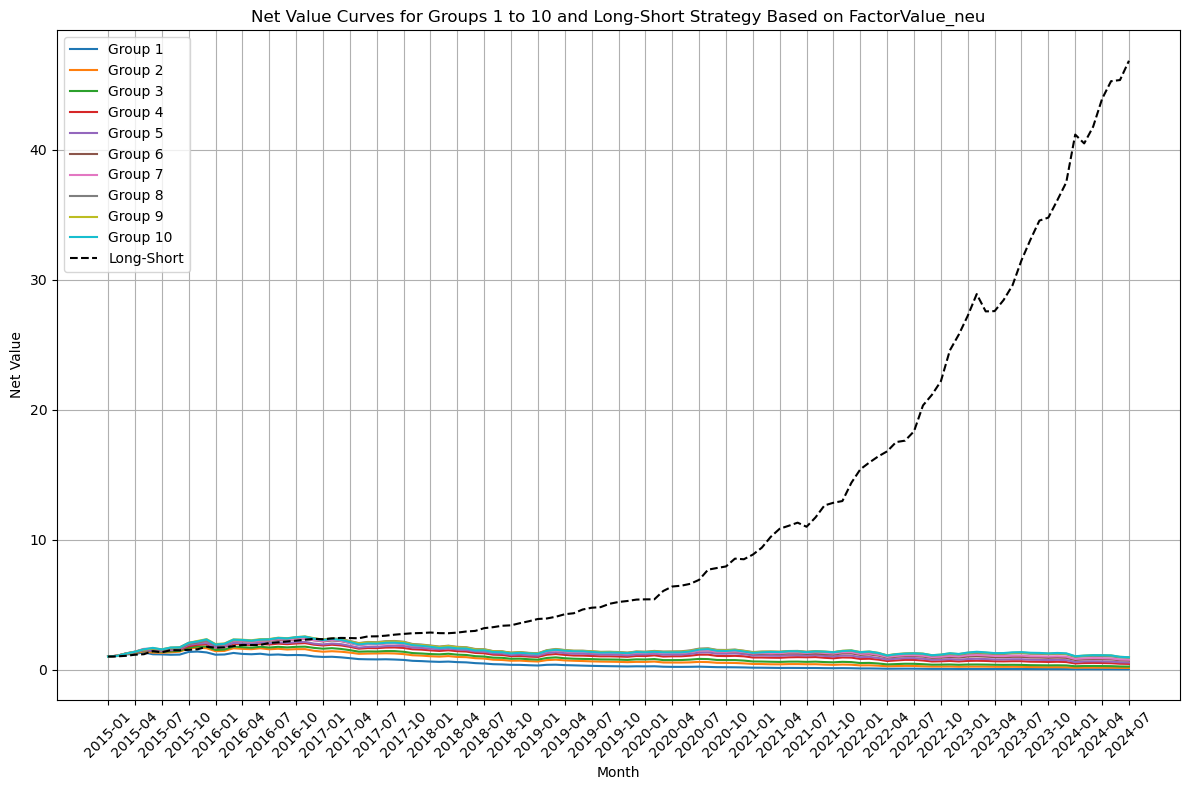

Annual Return: 49.91%
Annual Volatility: 13.07%
Information Ratio: 3.82
Monthly Win Rate: 87.83%
Max Drawdown: -6.36%


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11740\3086170104.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  long_short_net_value['Return'] = long_short_net_value['NetValue'].pct_change()


In [6]:
# 对FactorValue_neu进行十分组多空对冲净值走势分析，绘制回测曲线并计算年化收益率等指标
# 考虑了BlackList，月初交易时过滤掉不满足特定条件的股票
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 计算每支股票每天的收益率
df_PT['Return'] = df_PT['ClosePrice'] /  df_PT['PreClosePrice'] - 1

# 创建一个字典用于保存每组的净值
net_values = {i: pd.DataFrame(columns=['Month', 'NetValue']) for i in range(1, 11)}
long_short_net_value = pd.DataFrame(columns=['Month', 'NetValue'])

# 自动分析回测区间的开始和结束日期
df_PT['TradeDay'] = pd.to_datetime(df_PT['TradeDay'])
start_date = df_PT['TradeDay'].min().strftime('%Y-%m')
end_date = df_PT['TradeDay'].max().strftime('%Y-%m')

# 初始化每组的净值为1
initial_net_value = 1
for i in range(1, 11):
    net_values[i] = pd.concat([net_values[i], pd.DataFrame({'Month': [start_date], 'NetValue': [initial_net_value]})])

long_short_net_value = pd.concat([long_short_net_value, pd.DataFrame({'Month': [start_date], 'NetValue': [initial_net_value]})])

# 计算每个月的末日
df_PT['Month'] = df_PT['TradeDay'].dt.to_period('M')
end_of_month = df_PT.groupby('Month')['TradeDay'].max().reset_index()

# 新增logReturn列
df_PT['logReturn'] = np.log(df_PT['Return'] + 1)

# 循环处理每个月的数据
for i in range(len(end_of_month) - 1):
    month_end_day = end_of_month.iloc[i]['TradeDay']
    next_month_end_day = end_of_month.iloc[i + 1]['TradeDay']

    # 获取该月最后一天的所有股票数据
    month_data = df_PT[df_PT['TradeDay'] == month_end_day].copy()
    
    # 对FactorValue_neu进行十分组
    month_data.loc[:, 'FactorValue_rank'] = pd.qcut(month_data['FactorValue'], 10, labels=False) + 1

    returns = {}

    for group in range(1, 11):
        # 选出第x组的股票
        group_stocks = month_data[month_data['FactorValue_rank'] == group]['SecuCode'].values

        # 获取下个月这组股票的数据
        next_month_data = df_PT[(df_PT['TradeDay'] > month_end_day) & (df_PT['TradeDay'] <= next_month_end_day) & 
                                (df_PT['SecuCode'].isin(group_stocks))]

        # 过滤条件：停牌、涨跌停、新股涨停、ST股、非标准审计意见、未停牌
        next_month_data = next_month_data[
            (next_month_data['IfSuspend'] == 0) &  # 未停牌
            (next_month_data['ClosePrice'] != next_month_data['SDqLimit']) &  # 未达到涨跌停
            (next_month_data['ClosePrice'] != next_month_data['SDqStopping']) &  # 未达到涨跌停
            (next_month_data['IfNewStockUpLtd'] == 0) &  # 非新股涨停
            (next_month_data['IfST'] == 0) &  # 非ST股
            (next_month_data['IfNonStandardAShareAuditOpinion'] == 0)  # 非非标准审计意见
        ]
        
        # 计算每支股票的月收益率
        next_month_log_returns = next_month_data.groupby('SecuCode')['logReturn'].sum()
        next_month_returns = np.exp(next_month_log_returns) - 1

        # 计算第x组股票的平均月收益率
        avg_return = next_month_returns.mean()
        returns[group] = avg_return

        # 计算新的净值
        new_net_value = net_values[group].iloc[-1]['NetValue'] * (1 + avg_return)
        net_values[group] = pd.concat([net_values[group], pd.DataFrame({'Month': [str(next_month_end_day)[:7]], 'NetValue': [new_net_value]})])

    # 计算long-short策略的净值
    long_short_return = (1 + returns[10]) / (1 + returns[1]) - 1
    new_long_short_net_value = long_short_net_value.iloc[-1]['NetValue'] * (1 + long_short_return)
    long_short_net_value = pd.concat([long_short_net_value, pd.DataFrame({'Month': [str(next_month_end_day)[:7]], 'NetValue': [new_long_short_net_value]})])

# 绘制净值曲线
plt.figure(figsize=(12, 8))

for group in range(1, 11):
    plt.plot(net_values[group]['Month'], net_values[group]['NetValue'], linestyle='-', label=f'Group {group}')

plt.plot(long_short_net_value['Month'], long_short_net_value['NetValue'], linestyle='--', color='black', label='Long-Short')

plt.xlabel('Month')
plt.ylabel('Net Value')
plt.title('Net Value Curves for Groups 1 to 10 and Long-Short Strategy Based on FactorValue_neu')
plt.legend()

# 设置横轴每三个月标注一次
xticks = np.arange(0, len(long_short_net_value), step=3)
xlabels = [long_short_net_value['Month'].iloc[i] for i in xticks]
plt.xticks(ticks=xticks, labels=xlabels, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

# 计算long-short策略的绩效指标
long_short_net_value['Return'] = long_short_net_value['NetValue'].pct_change()

# 年化收益率
annual_return = (long_short_net_value['NetValue'].iloc[-1] / long_short_net_value['NetValue'].iloc[0]) ** (12 / (len(long_short_net_value) - 1)) - 1

# 年化波动率
annual_volatility = long_short_net_value['Return'].std() * np.sqrt(12)

# 信息比率
information_ratio = annual_return / annual_volatility

# 月度胜率
monthly_win_rate = (long_short_net_value['Return'] > 0).mean()

# 最大回撤率
rolling_max = long_short_net_value['NetValue'].cummax()
drawdown = (long_short_net_value['NetValue'] - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# 打印结果
print(f"Annual Return: {annual_return:.2%}")
print(f"Annual Volatility: {annual_volatility:.2%}")
print(f"Information Ratio: {information_ratio:.2f}")
print(f"Monthly Win Rate: {monthly_win_rate:.2%}")
print(f"Max Drawdown: {max_drawdown:.2%}")